<center>
<img src="https://mlcourse.ai/_images/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
Author: Arina Lopukhova (@erynn). Edited by [Yury Kashnitskiy](https://yorko.github.io) (@yorko) and Vadim Shestopalov (@vchulski). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# Анализ данных | Python 

*Автор: Татьяна Рогович, НИУ ВШЭ*

### Анализ данных в Pandas. Упражнения
    
Данные содержат следующие признаки:

* `ID` - Unique number for each athlete
* `Name` - Athlete's name
* `Sex` - M or F
* `Age` - Integer
* `Height` - In centimeters
* `Weight` - In kilograms
* `Team` - Team name
* `NOC` - National Olympic Committee 3-letter code
* `Games` - Year and season
* `Year` - Integer
* `Season` - Summer or Winter
* `City` - Host city
* `Sport` - Sport
* `Event` - Event
* `Medal` - Gold, Silver, Bronze, or NA


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/rogovich/Data/master/data/olympics/athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


**1. Найдите среднее и стандартное отклонение для роста теннисисток (большой теннис), которые участвовали в играх 2000 года. Округлите ответ до второго знака.**


In [4]:
data[(data['Event'].str.startswith("Tennis")) & (data['Year'] == 2000) & (data['Sex'] == 'F')]['Height'].mean()

171.792

In [5]:
data[(data['Event'].str.startswith("Tennis")) & (data['Year'] == 2000) & (data['Sex'] == 'F')]['Height'].std()


6.4586725890776675

__2. Найдите абсолютную разницу между количеством уникальных видов спорта на играх в 1988 году и в 2002.__



In [6]:
abs(len(data[data['Year'] == 1988]['Sport'].unique()) - len(data[data['Year'] == 2002]['Sport'].unique()))

22

__3. Постройте распределение возраста керлингистов (мужчик), участвовавших в олимпиаде в Sochi__ 

<AxesSubplot:>

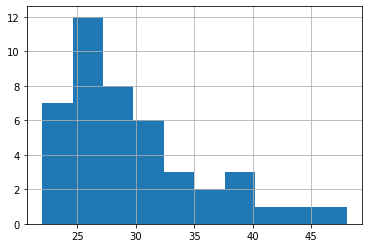

In [7]:
data[(data['Event'].str.contains("Curling")) & (data['Sex'] == 'M') & (data['City'] == 'Sochi')]['Age'].hist()

__4. Выведите бар-чарт для медалей (золотые, серебряные и бронзовые) для Australia за всю историю зимних олипиад__

<AxesSubplot:>

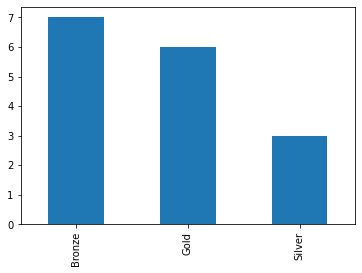

In [9]:
data[(data['Team'] == 'Australia') & (data['Season'] == 'Winter') & \
     (data['Medal'].notna())]['Medal'].value_counts().plot(kind = 'bar')

__5. Выведете средний вес атлетов и атлеток, участвующих в соревнованиях по гимнастике (Gymnastics), но не учитывая художественную гимнастику (Rhythmic Gymnastics). Не учитывайте одних и тех же атлетов два раза.__

In [16]:
data[data['Sport'].str.startswith('Gymnastics') & \
     (data['Sex'] == 'M')].drop_duplicates(['Name', 'Height', 'Weight'])['Weight'].mean()


8

In [10]:
data[data['Sport'].str.startswith('Gymnastics') & \
     (data['Sex'] == 'F')].drop_duplicates(['Name', 'Height', 'Weight'])['Weight'].mean()


47.2570796460177